In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import titanic.csv as a DataFrame
df = pd.read_csv(r'c:\users\aaron\appdata\local\programs\python\python37\titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# explore data set

np.max(df['Age']) # age of eldest passenger
len(df['Fare'].unique()) # number of different fares
df['Survived'].sum() # number of survivors
len((df.loc[lambda x: df['Sex'] == 'female', :])) # number of female passengers
len((df.loc[lambda x: df['Sex'] == 'male', :])) # number of male passengers
df_survived = df.loc[lambda x: df['Survived'] > 0, :] # subset df by only surviving passengers
df_deceased = df.loc[lambda x: df['Survived'] == 0, :] # subset df by not surviving passengers

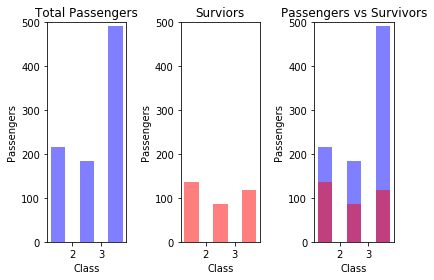

Not surprisingly, you had a far better chance of surviving the Titanic if you booked a first class fare.
With a total number of 891 passengers, 216 had first class fares, 184 had second class fares,
and 491 had third class fares. Of those, 136 first class passengers survived (that's roughly two thirds),
 87 second class passengers survived (less than half), and 119 third class passengers survived (or 1 out of 4).


In [59]:
# plot of a histogram of percentage of total passengers based on class
# plot of histogram of percentage of total surviving passengers based on class
# compare histograms

plt.subplot(1,3,1)
plt.hist(df['Pclass'], bins=np.arange(1,5), color='blue', alpha=.5, rwidth=0.5)
plt.ylim(0,500)
plt.xlabel('Class')
plt.ylabel('Passengers')
plt.title('Total Passengers')

plt.subplot(1,3,2)
plt.hist(df_survived['Pclass'], bins=np.arange(1,5), color='red', alpha=.5, rwidth=0.5)
plt.ylim(0,500)
plt.xlabel('Class')
plt.ylabel('Passengers')
plt.title('Surviors')

plt.subplot(1,3,3)
plt.hist(df['Pclass'], bins=np.arange(1,5), color='blue', alpha=.5, rwidth=0.5)
plt.hist(df_survived['Pclass'], bins=np.arange(1,5), color='red', alpha=.5, rwidth=0.5)
plt.ylim(0,500)
plt.xlabel('Class')
plt.ylabel('Passengers')
plt.title('Passengers vs Survivors')

plt.tight_layout()
plt.show()

print("Not surprisingly, you had a far better chance of surviving the Titanic if you booked a first class fare."
      "\nWith a total number of" , np.max(df['PassengerId']) , "passengers," , len(df[df['Pclass']==1]) ,
      "had first class fares," , len(df[df['Pclass']==2]) , "had second class fares,\nand" , len(df[df['Pclass']==3])
      , "had third class fares. Of those," , len(df_survived[df_survived['Pclass']==1]) , "first class passengers survived"
      " (that's roughly two thirds),\n" , len(df_survived[df_survived['Pclass']==2]) , "second class passengers survived"
      " (less than half), and" , len(df_survived[df_survived['Pclass']==3]) , "third class passengers survived (or 1 out of 4)."
     )

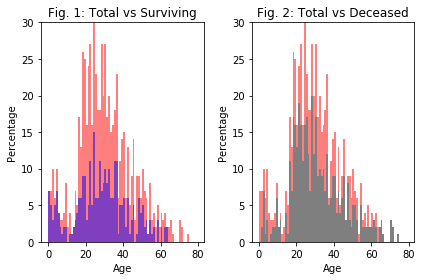

Every man for himself: we would expect the most able-bodied people to have the highest likelyhood of surviving, right?
Surprisingly, no. In Figure 1, we can see the total age distribution in red compared to the age distribution of
surviving passengers in blue. The majority of passengers are in the 20-40 range, but the majority of deceased passengers
also happens to be in the 20-40 range as we can see in Figure 2. It appears being able bodied was not a guarantee of survival
aboard the Titanic.


In [56]:
# plot a histogram of the ages of the passengers
# compare age data for surving passengers

plt.subplot(1,2,1)
plt.hist(df['Age'], bins=np.arange(80), color='red', alpha=.5)
plt.hist(df_survived['Age'], bins=np.arange(80), color='blue', alpha=.5)
plt.ylim(0,30)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Fig. 1: Total vs Surviving')

plt.subplot(1,2,2)
plt.hist(df['Age'], bins=np.arange(80), color='red', alpha=.5)
plt.hist(df_deceased['Age'], bins=np.arange(80), color='teal', alpha=.5)
plt.ylim(0,30)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Fig. 2: Total vs Deceased')

plt.tight_layout()
plt.show()

print("Every man for himself: we would expect the most able-bodied people to have the highest likelyhood of surviving, right?"
      "\n""Surprisingly, no. In Figure 1, we can see the total age distribution in red compared to the age distribution of"
      "\n""surviving passengers in blue. The majority of passengers are in the 20-40 range, but the majority of deceased"
      " passengers""\n""also happens to be in the 20-40 range as we can see in Figure 2. It appears being able bodied"
      " was not a guarantee of survival""\n""aboard the Titanic."
)

In [55]:
df_s_w = df_survived.loc[lambda x: df['Sex'] == 'female', :]
df_s_c = df_survived.loc[lambda x: df['Age'] < 16, :]

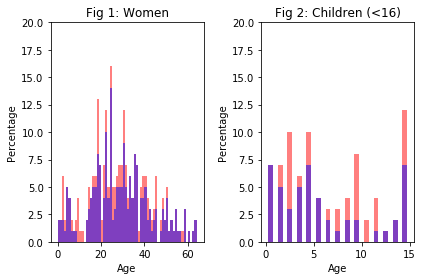

What about women and children, did they have a higher chance of survival? In this case, yes (mostly). In Figure 1 we can see
the total number of female passengers in red compared to the total number of surviving female passengers in blue.
In the same manner, we can see the total number of childen under in the age of 16 in red in Figure 2 compared to the total
number of surviving children in blue. Of the 314 women on board, 233 survived (aproximately 75%) and of the 83 children on
board, 49 survived (almost 60%). Turns out the movies got it right, women and children must have gotten on the lifeboats first.


In [68]:
# plot a histogram comparing surving women and children

x = df[df['Age'] < 16]
y = df[df['Sex'] == 'female']

plt.subplot(1,2,1)
plt.hist(y['Age'], bins=np.arange(65), color='red', alpha=.5)
plt.hist(df_s_w['Age'], bins=np.arange(65), color='blue', alpha=.5)
plt.ylim(0,20)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Fig 1: Women')

plt.subplot(1,2,2)
plt.hist(x['Age'], bins=np.arange(16), color='red', alpha=.5, rwidth=.5)
plt.hist(df_s_c['Age'], bins=np.arange(16), color='blue', alpha=.5, rwidth=.5)
plt.ylim(0,20)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Fig 2: Children (<16)')

plt.tight_layout()
plt.show()

print("What about women and children, did they have a higher chance of survival? In this case, yes (mostly)."
      " In Figure 1 we can see""\n""the total number of female passengers in red compared to the total number of surviving"
      " female passengers in blue.""\n""In the same manner, we can see the total number of childen under in the age"
      " of 16 in red in Figure 2 compared to the total""\n""number of surviving children in blue. Of the"
      , len(df[df['Sex']=='female']) , "women on board," , len(df_survived[df_survived['Sex']=='female']) ,
      "survived (aproximately 75%) and of the" , len(df[df['Age'] < 16]) , "children on""\n""board," , 
      len(df_survived[df_survived['Age'] < 16]) , "survived (almost 60%). Turns out the movies got it right, women and"
      " children must have gotten on the lifeboats first."
     )

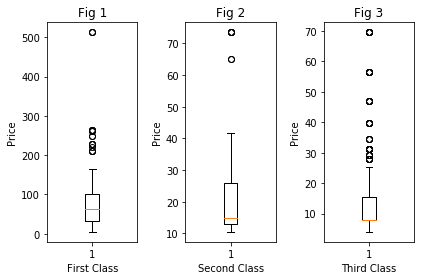

With 248 different fares for 891 passengers, we can be sure to expect a wide variance in fare price. Figure 1 shows that
first class fares ranged from as high as 512.3292 to as low as 5.0 , while fares in the second class ranged from 73.5 to 10.5 
(Figure 2), and from 69.55 to 4.0125 in third class (Figure 3). Though this is a bit more variance than we should expect.
Also, it's unlikely that the minimum first class fare is less than the minimum second class fare andonly slightly higher
than the minimum first class fare. This is likely a sign that the data needs cleaning or requires further inspection before
we conduct any analysis.


In [103]:
# plot a series of boxplots comparing fare prices

x = df[df['Pclass'] == 1]
x = x[x['Fare'] != 0]

y = df[df['Pclass'] == 2]
y = y[y['Fare'] != 0]

z = df[df['Pclass'] == 3]
z = z[z['Fare'] != 0]

plt.subplot(1,3,1)
plt.boxplot(x['Fare'])
plt.xlabel('First Class')
plt.ylabel('Price')
plt.title('Fig 1')

plt.subplot(1,3,2)
plt.boxplot(y['Fare'])
plt.xlabel('Second Class')
plt.ylabel('Price')
plt.title('Fig 2')

plt.subplot(1,3,3)
plt.boxplot(z['Fare'])
plt.xlabel('Third Class')
plt.ylabel('Price')
plt.title('Fig 3')

plt.tight_layout()
plt.show()

print("With" , len(df['Fare'].unique()) , "different fares for" , np.max(df['PassengerId']) , "passengers, we can be sure"
      " to expect a wide variance in fare price. Figure 1 shows that""\n""first class fares ranged from as high as"
      , np.max(x['Fare']) , "to as low as" , np.min(x['Fare']) , ", while fares in the second class ranged from"
      , np.max(y['Fare']) , "to" , np.min(y['Fare']) , "\n""(Figure 2), and from" , np.max(z['Fare']) , "to"
      , np.min(z['Fare']) , "in third class (Figure 3). Though this is a bit more variance than we should expect."
      "\n""Also, it's unlikely that the minimum first class fare is less than the minimum second class fare and"
      "only slightly higher""\n""than the minimum first class fare. This is likely a sign that the data needs cleaning"
      " or requires further inspection before""\n""we conduct any analysis."
 )